In [ ]:
#regressao utilizando o otimizador
#bibliotecas
import numpy as np #biblioteca para trabalhar com vetores e matrizes
import scipy #biblioteca necessária para obter as funções de treinamento
import matplotlib.pyplot as plt #biblioteca para construção de gráficos
from scipy.optimize import curve_fit #biblioteca para realizar a otimização dos mse

In [ ]:
#definicao de variaveis
idade=[18,25,57,45,26,64,37,40,24,33]#variaveis independentes
salarioAnual = [15000,29000,68000,52000,32000,80000,41000,45000,26000,33000]#variaveis dependentes
#transformando a lista em array
xData = np.array(idade)
yData = np.array(salarioAnual)

In [ ]:
#definindo a funcao a ser otimizada (regressao simples)
def equacaoLinear(x,a,b):
  return a*x+b

In [ ]:
#gera os valores iniciais para o otimizador
parametrosIniciais = np.array([1.0,1.0])

In [ ]:
#realiza a otimizacao atraves do erro medio quadrado(MSE)
parametrosOtimizados,pcov = curve_fit(equacaoLinear,xData,yData,parametrosIniciais)
# parametrosOtimizados possui os parametros de ajuste da curva
# pcov - contem a covariancia dos parametros encontrados

In [ ]:
#realiza a previsao dos dados atraves do modelo (constroi a equacao linear)
previsaoModelo = equacaoLinear(xData,*parametrosOtimizados) 

In [ ]:
#encontra o erro absoluto
erroAbsoluto = previsaoModelo - yData

In [ ]:
#calcula a media do erro quadrado
SE = np.square(erroAbsoluto)
#calcula o MSE
MSE = np.mean(SE)
print('SE: ',SE)
print('MSE: ',MSE)


SE:  [ 4587883.33064101  6834760.82563804   413069.18137435   634115.64144357
 18436761.23538558  4467167.3659006   1517955.21070226  1424802.59030848
   873982.13514337 15601891.57382987]
MSE:  5479238.909036714


In [ ]:
#determina o calculo do coeficiente de determinação
# O quanto a idade determina o salario?
Rsquared = 1.0-(np.var(erroAbsoluto)/np.var(yData))
print('Coeficiente de determinação: ',Rsquared)
#quando o modelo se aproxima de 1, quer dizer que o poder de previsao foi alto

Coeficiente de determinação:  0.9846300347582353


In [ ]:
#mostra os parametros da regressao
print('Y = {}x {}'.format(parametrosOtimizados[0],parametrosOtimizados[1]))

Y = 1320.5325666669085x -6627.651716729711


Text(0, 0.5, 'Salario Anual (R$)')

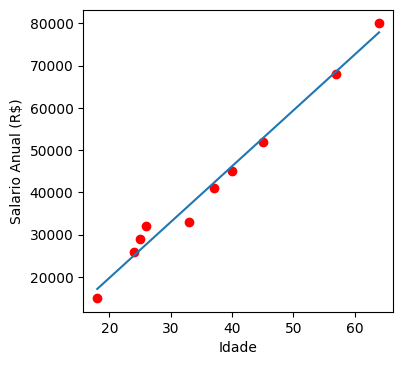

In [ ]:
#realizando o plot das equacoes
f = plt.figure(figsize=(4,4),dpi =100)
axes = f.add_subplot(111)

axes.plot(xData,yData,'ro')

#cria os dados para serem utilizados na construcao da linha (equacao)
xModel = np.linspace(min(xData),max(xData))
yModel = equacaoLinear(xModel,*parametrosOtimizados)

#realiza o plot da linha
axes.plot(xModel,yModel)
plt.xlabel('Idade')
plt.ylabel('Salario Anual (R$)')

In [ ]:
#utilizando as funcoes do sklearn para realizar a regressao linear
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
reg = LinearRegression()
x_Modelsklearn = xData.reshape((-1,1))
regressao = reg.fit(x_Modelsklearn,yData)

In [ ]:
previsao = reg.predict(x_Modelsklearn)

In [ ]:
MSE = mean_squared_error(yData,previsao)
print('MSE: ',MSE)

MSE:  5479238.909036706


In [ ]:
#parametros encontrados
print('Y = {}x {}'.format(reg.coef_,reg.intercept_))
from sklearn.metrics import r2_score
R_2 = r2_score(yData,previsao)
print('Coeficiente de determinação (R2): ',R_2)

Y = [1320.53256496]x -6627.651646877624
Coeficiente de determinação (R2):  0.9846300347582353


In [ ]:
#Utilizando regressao linear com um bd mais complexo
import pandas as pd


In [ ]:
#funcao utilizada apenas para realizar o upload dos dados para o google colab
from google.colab import files
uploaded = files.upload()

Saving datasets_36320_54895_headbrain.csv to datasets_36320_54895_headbrain.csv


In [ ]:
#criar a leitura do banco de dados
data = pd.read_csv("datasets_36320_54895_headbrain.csv")
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [ ]:
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [ ]:
#construcao do modelo de regressao
reg = LinearRegression()
X_Reshaped = x.reshape((-1,1))
regressao = reg.fit(X_Reshaped,y)

In [ ]:
previsao = reg.predict(X_Reshaped)

In [ ]:
print('Y={}x +{}'.format(reg.coef_,reg.intercept_))
R_2 = r2_score(y,previsao)
print("Coeficiente de determinação (R2): ",R_2)

Y=[0.26342934]x +325.5734210494426
Coeficiente de determinação (R2):  0.639311719957


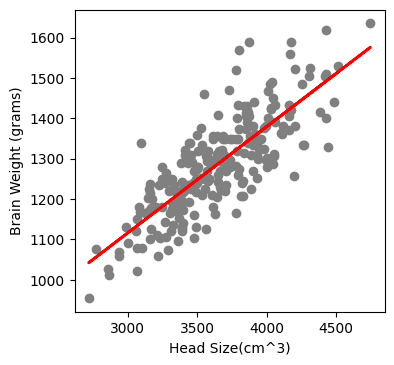

In [ ]:
plt.figure(figsize=(4,4),dpi =100)
plt.scatter(x,y,color='grey')
plt.plot(x,previsao,color='red',linewidth=2)
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.show()